In [222]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd
import datetime
from datetime import timedelta
%matplotlib inline
plt.style.use('fivethirtyeight')

In [223]:
data = pd.read_excel('Microgrid Data.xlsx')
#data.head()

In [224]:
data.dtypes

No                                     int64
Date                          datetime64[ns]
Hour                                   int64
Load                                 float64
Wind Speed (m/s)                     float64
PV Production (kW)                   float64
Total Wind Production (kW)           float64
dtype: object

In [225]:
data.describe()

,No,Hour,Load,Wind Speed (m/s),PV Production (kW),Total Wind Production (kW)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4380.500000,11.500000,1206.993747,5.955160,465.103723,509.818825
std,2528.938512,6.922582,273.366649,0.895772,772.804194,298.686848
min,1.000000,0.000000,829.756000,3.266542,0.000000,11.059908
25%,2190.750000,5.750000,1005.100000,5.271204,0.000000,298.617511
50%,4380.500000,11.500000,1142.628000,5.942433,12.236907,442.396313
75%,6570.250000,17.250000,1317.428000,6.665088,617.963779,713.364055
max,8760.000000,23.000000,2643.228000,8.646830,3505.873715,1609.216590


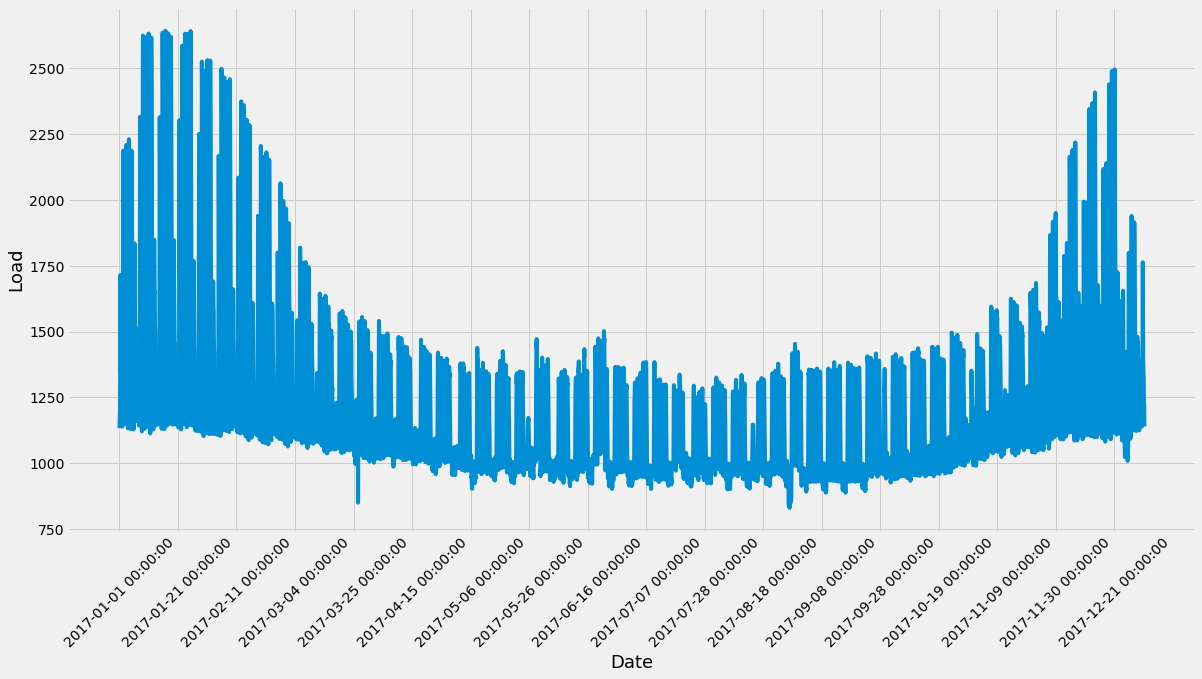

In [226]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Load']))
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Load',fontsize=18)
plt.show()

In [227]:
from datetime import date
from pandas.tseries.holiday import Holiday, AbstractHolidayCalendar
class BelgianHolidaysCalendar(AbstractHolidayCalendar):
    rules = [Holiday('NY', month=1, day=1),
             Holiday('Easter', month=4, day=17),
         Holiday('Labour day', month=5, day=1),
         Holiday('Ascension day', month=5, day=25),
         Holiday('White Monday day', month=6, day=5),
             Holiday('Belgian National day', month=7, day=21),
             Holiday('Assumption day', month=8, day=15),
             Holiday('All Saints day', month=11, day=1),
             Holiday('Armistice day', month=11, day=11),
             Holiday('Xmas day', month=12, day=25)
   ]
    
cal = BelgianHolidaysCalendar()
holidays = cal.holidays(start = data.Date.min(), end = data.Date.max())
data["IS_HOLIDAY"] = data.Date.isin(holidays)
data.IS_HOLIDAY = data.IS_HOLIDAY.astype("int")
data.drop(['No'], axis=1, inplace = True)
# data.head(100)

In [228]:
data = data.set_index(['Date'], drop=True)
data.head()

,Hour,Load,Wind Speed (m/s),PV Production (kW),Total Wind Production (kW),IS_HOLIDAY
Date,,,,,,
2017-01-01,0,1133.028,5.633630,0.0,1105.990783,1
2017-01-01,1,1150.828,6.577402,0.0,658.064516,1
2017-01-01,2,1175.556,6.798660,0.0,1498.617512,1
2017-01-01,3,1183.288,7.709222,0.0,1200.000000,1
2017-01-01,4,1184.544,7.050374,0.0,658.064516,1


In [229]:
data.drop(columns = 'Hour', axis = 1, inplace = True)
df1 = data.pop('Load')
data['Load'] = df1
data.head()

,Wind Speed (m/s),PV Production (kW),Total Wind Production (kW),IS_HOLIDAY,Load
Date,,,,,
2017-01-01,5.633630,0.0,1105.990783,1,1133.028
2017-01-01,6.577402,0.0,658.064516,1,1150.828
2017-01-01,6.798660,0.0,1498.617512,1,1175.556
2017-01-01,7.709222,0.0,1200.000000,1,1183.288
2017-01-01,7.050374,0.0,658.064516,1,1184.544


In [230]:
data.isnull().sum()

Wind Speed (m/s)              0
PV Production (kW)            0
Total Wind Production (kW)    0
IS_HOLIDAY                    0
Load                          0
dtype: int64

In [231]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

            Wind Speed (m/s)  PV Production (kW)  Total Wind Production (kW)  \
Date                                                                           
2017-01-01          5.633630                 0.0                 1105.990783   
2017-01-01          6.577402                 0.0                  658.064516   
2017-01-01          6.798660                 0.0                 1498.617512   
2017-01-01          7.709222                 0.0                 1200.000000   
2017-01-01          7.050374                 0.0                  658.064516   

            IS_HOLIDAY      Load  
Date                              
2017-01-01           1  1133.028  
2017-01-01           1  1150.828  
2017-01-01           1  1175.556  
2017-01-01           1  1183.288  
2017-01-01           1  1184.544  


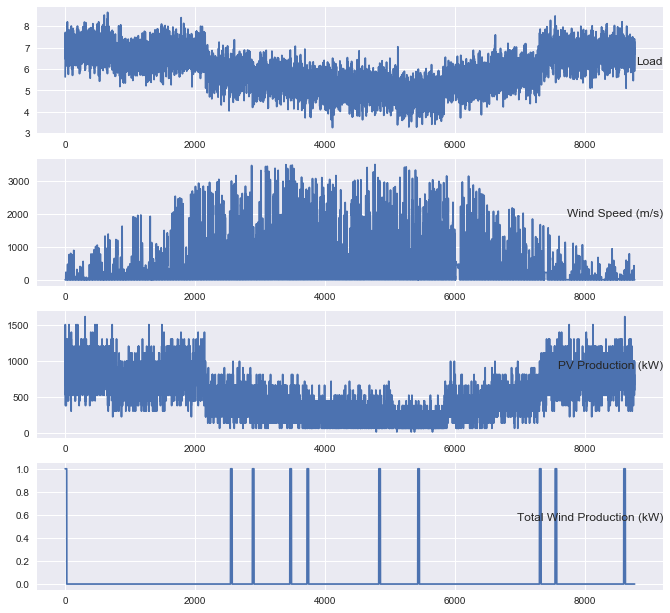

In [377]:
print(data.head())
values = data.values
groups = [0, 1, 2, 3]
i = 1
plt.figure(figsize = (10,10))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(features.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [232]:
values = data.astype('float32')
ts_data = series_to_supervised(values, 1, 1)

In [243]:
scaler_des = StandardScaler().fit(ts_data)
scaled_features = scaler_des.fit_transform(ts_data)
scaled_features_df = pd.DataFrame(scaled_features)
scaled_features_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.358838,-0.60192,1.996016,5.957838,-0.270603,0.694608,-0.60192,0.496666,5.970639,-0.205491
1,0.694830,-0.60192,0.496358,5.957838,-0.205488,0.941612,-0.60192,3.311467,5.970639,-0.115033
2,0.941851,-0.60192,3.310532,5.957838,-0.115031,1.958131,-0.60192,2.311472,5.970639,-0.086749
3,1.958441,-0.60192,2.310760,5.957838,-0.086746,1.222616,-0.60192,0.496666,5.970639,-0.082155
4,1.222875,-0.60192,0.496358,5.957838,-0.082152,1.299957,-0.60192,-0.225553,5.970639,0.114623


In [245]:
values = scaled_features_df.values
n_train_hours = 1460 * 5
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(7300, 1, 9) (7300,) (1459, 1, 9) (1459,)


Train on 7300 samples, validate on 1459 samples
Epoch 1/50
 - 2s - loss: 0.5009 - val_loss: 0.4971
Epoch 2/50
 - 0s - loss: 0.3188 - val_loss: 0.3663
Epoch 3/50
 - 0s - loss: 0.2006 - val_loss: 0.2177
Epoch 4/50
 - 0s - loss: 0.1486 - val_loss: 0.1944
Epoch 5/50
 - 0s - loss: 0.1444 - val_loss: 0.1931
Epoch 6/50
 - 0s - loss: 0.1423 - val_loss: 0.1911
Epoch 7/50
 - 0s - loss: 0.1409 - val_loss: 0.1893
Epoch 8/50
 - 0s - loss: 0.1398 - val_loss: 0.1889
Epoch 9/50
 - 0s - loss: 0.1390 - val_loss: 0.1886
Epoch 10/50
 - 0s - loss: 0.1385 - val_loss: 0.1892
Epoch 11/50
 - 1s - loss: 0.1388 - val_loss: 0.1897
Epoch 12/50
 - 0s - loss: 0.1396 - val_loss: 0.1976
Epoch 13/50
 - 0s - loss: 0.1373 - val_loss: 0.1938
Epoch 14/50
 - 0s - loss: 0.1387 - val_loss: 0.1930
Epoch 15/50
 - 0s - loss: 0.1379 - val_loss: 0.1969
Epoch 16/50
 - 0s - loss: 0.1383 - val_loss: 0.1982
Epoch 17/50
 - 0s - loss: 0.1363 - val_loss: 0.1945
Epoch 18/50
 - 0s - loss: 0.1373 - val_loss: 0.1928
Epoch 19/50
 - 0s - loss:

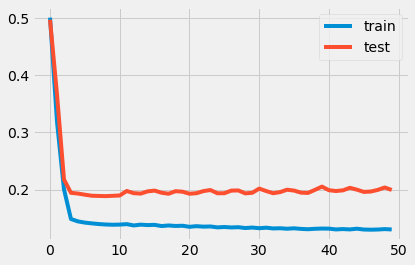

In [246]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [264]:
# make a prediction
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
inv_yhat = concatenate((yhat, test_X), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler_des.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, :]), axis=1)
inv_y = scaler_des.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(1459, 10)
Test RMSE: 0.311


Train on 7300 samples, validate on 1459 samples
Epoch 1/50
 - 2s - loss: 0.4311 - val_loss: 0.4312
Epoch 2/50
 - 0s - loss: 0.2286 - val_loss: 0.2447
Epoch 3/50
 - 0s - loss: 0.1493 - val_loss: 0.1978
Epoch 4/50
 - 0s - loss: 0.1438 - val_loss: 0.1924
Epoch 5/50
 - 0s - loss: 0.1428 - val_loss: 0.1910
Epoch 6/50
 - 0s - loss: 0.1416 - val_loss: 0.1921
Epoch 7/50
 - 0s - loss: 0.1426 - val_loss: 0.1923
Epoch 8/50
 - 0s - loss: 0.1407 - val_loss: 0.1898
Epoch 9/50
 - 0s - loss: 0.1401 - val_loss: 0.1881
Epoch 10/50
 - 0s - loss: 0.1395 - val_loss: 0.1892
Epoch 11/50
 - 0s - loss: 0.1405 - val_loss: 0.1949
Epoch 12/50
 - 0s - loss: 0.1402 - val_loss: 0.1925
Epoch 13/50
 - 0s - loss: 0.1385 - val_loss: 0.1901
Epoch 14/50
 - 0s - loss: 0.1402 - val_loss: 0.1912
Epoch 15/50
 - 0s - loss: 0.1388 - val_loss: 0.1951
Epoch 16/50
 - 0s - loss: 0.1382 - val_loss: 0.1900
Epoch 17/50
 - 0s - loss: 0.1394 - val_loss: 0.1902
Epoch 18/50
 - 0s - loss: 0.1378 - val_loss: 0.1928
Epoch 19/50
 - 0s - loss:

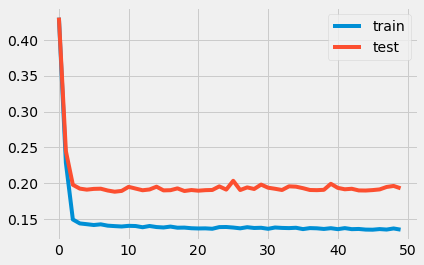

In [273]:
model = Sequential()
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
model.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [275]:
# make a prediction
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
inv_yhat = concatenate((yhat, test_X), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler_des.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, :]), axis=1)
inv_y = scaler_des.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(1459, 10)
Test RMSE: 0.304


In [325]:
stdscaler = StandardScaler().fit(data)
scaled_feats = scaler_des.fit_transform(data)

In [342]:
# specify the number of lag hours
n_hours = 3
n_features = 5
# frame as supervised learning
reframed = series_to_supervised(scaled_feats, n_hours, 1)
print(reframed)
# split into train and test sets
values = reframed.values
n_train_hours = 1460 * 5
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
# print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

      var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var1(t-2)  \
3     -0.358963  -0.601873   1.996091   5.958188  -0.270589   0.694683   
4      0.694683  -0.601873   0.496353   5.958188  -0.205471   0.941700   
5      0.941700  -0.601873   3.310675   5.958188  -0.115009   1.958269   
6      1.958269  -0.601873   2.310850   5.958188  -0.086723   1.222718   
7      1.222718  -0.601873   0.496353   5.958188  -0.082128   1.300063   
8      1.300063  -0.601873  -0.225743   5.958188   0.114659   1.002231   
9      1.002231  -0.601873  -0.447926   5.958188   0.511907   0.931106   
10     0.931106  -0.601873   1.311025   5.958188   1.164299   0.554454   
11     0.554454  -0.601873   0.033471   5.958188   1.831851   1.700459   
12     1.700459  -0.586038   0.274170   5.958188   1.860180   1.446122   
13     1.446122  -0.324755   1.607270   5.958188   1.355335   1.063167   
14     1.063167  -0.308920   0.996266   5.958188   0.948035   1.731533   
15     1.731533  -0.340591   1.607270 

In [344]:
train_y

array([1.9582692 , 1.22271824, 1.30006282, ..., 1.16566737, 0.07741499,
       1.44644717])

Train on 7300 samples, validate on 1457 samples
Epoch 1/50
 - 3s - loss: 0.5576 - val_loss: 0.5568
Epoch 2/50
 - 1s - loss: 0.4902 - val_loss: 0.4723
Epoch 3/50
 - 1s - loss: 0.4803 - val_loss: 0.4709
Epoch 4/50
 - 1s - loss: 0.4792 - val_loss: 0.4678
Epoch 5/50
 - 1s - loss: 0.4790 - val_loss: 0.4679
Epoch 6/50
 - 1s - loss: 0.4788 - val_loss: 0.4697
Epoch 7/50
 - 1s - loss: 0.4787 - val_loss: 0.4694
Epoch 8/50
 - 1s - loss: 0.4785 - val_loss: 0.4680
Epoch 9/50
 - 1s - loss: 0.4784 - val_loss: 0.4660
Epoch 10/50
 - 1s - loss: 0.4784 - val_loss: 0.4644
Epoch 11/50
 - 1s - loss: 0.4788 - val_loss: 0.4631
Epoch 12/50
 - 1s - loss: 0.4787 - val_loss: 0.4606
Epoch 13/50
 - 1s - loss: 0.4789 - val_loss: 0.4591
Epoch 14/50
 - 1s - loss: 0.4790 - val_loss: 0.4581
Epoch 15/50
 - 1s - loss: 0.4792 - val_loss: 0.4579
Epoch 16/50
 - 1s - loss: 0.4796 - val_loss: 0.4581
Epoch 17/50
 - 1s - loss: 0.4796 - val_loss: 0.4581
Epoch 18/50
 - 1s - loss: 0.4794 - val_loss: 0.4582
Epoch 19/50
 - 1s - loss:

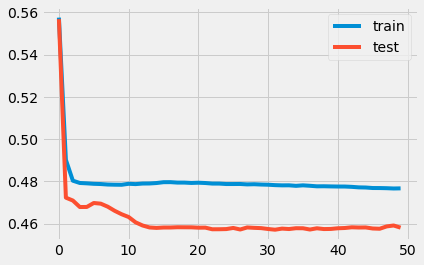

In [343]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [347]:
# make a prediction
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = stdscaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.297


In [380]:
yhat

array([[0.70040286],
       [0.9202023 ],
       [0.86786705],
       ...,
       [0.91400886],
       [0.79997444],
       [0.91100824]], dtype=float32)

In [301]:
scaled_data = StandardScaler().fit_transform(data)
scaled_data_df = pd.DataFrame(scaled_data, columns = ['Windspeed', 'PV', 'WindProd','isHoliday','Load'])
scaled_data_df.head()

,Windspeed,PV,WindProd,isHoliday,Load
0,-0.358963,-0.601873,1.996091,5.958188,-0.270589
1,0.694683,-0.601873,0.496353,5.958188,-0.205471
2,0.941700,-0.601873,3.310675,5.958188,-0.115009
3,1.958269,-0.601873,2.310850,5.958188,-0.086723
4,1.222718,-0.601873,0.496353,5.958188,-0.082128


In [304]:
y = scaled_data_df['Load']
X = scaled_data_df.drop(['Load'], axis = 1)

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [311]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(X_train, label = y_train)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

print(mean_absolute_error(y_test, preds))
print(mean_squared_error(y_test, preds))

0.7308184831286387
0.9457485237435752


In [354]:
scaled_features_df = pd.DataFrame(scaled_features, columns = ['P_Windspeed', 'P_PV', 'P_WindProd','P_isHoliday','P_Load', 'Windspeed', 'PV', 'WindProd','isHoliday','Load'])

In [358]:
scaled_features_df.to_csv('scaled_data.csv', index = False)

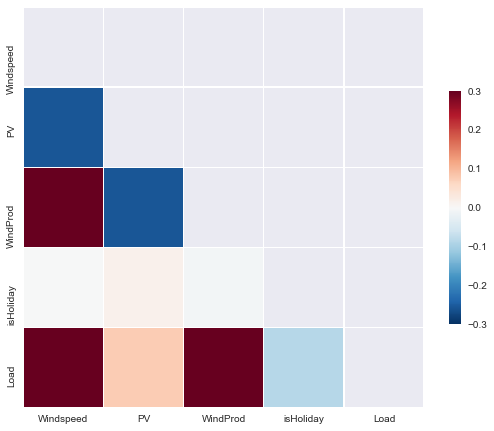

In [378]:
import seaborn as sns
# Compute the correlation matrix
corr = scaled_data_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Load is more affected by the wind power in the Belgium area. Holiday effect does not matter

In [366]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
        
# ADF Test on each column
for name, column in scaled_data_df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

/Users/parth/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/parth/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


    Augmented Dickey-Fuller Test on "Windspeed" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0504
 No. Lags Chosen       = 37
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.2649. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "PV" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3619
 No. Lags Chosen       = 29
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "WindProd" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationa

In [367]:
y = scaled_data_df['Load']
X = scaled_data_df.drop(['Load'], axis = 1)

In [368]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [372]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    X_train = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in data.columns:
        for r in X_train.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            X_train.loc[r, c] = min_p_value
    X_train.columns = [var + '_x' for var in variables]
    X_train.index = [var + '_y' for var in variables]
    return X_train

grangers_causation_matrix(scaled_data_df, variables = scaled_data_df.columns)

,Windspeed_x,PV_x,WindProd_x,isHoliday_x,Load_x
Windspeed_y,1.0000,0.0000,0.0000,0.6204,0.0000
PV_y,0.0000,1.0000,0.0000,0.7754,0.0000
WindProd_y,0.0000,0.0000,0.4972,0.1438,0.0000
isHoliday_y,0.2767,0.5958,0.0727,1.0000,0.2385
Load_y,0.0000,0.0000,0.0000,0.0108,1.0000


In [ ]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(train_X, train_y)
print(tpot.score(test_X, test_y))